# Introduction to "TaylorBall"

The following code is designed to simulate the sport of Major League Baseball (MLB) through past data to assess and verify the probabilities of the simulations. This project will consist of 3 stages, ranging from basic to advanced, ultimately ending in a final project that satisfies Dr. Chad Westphal.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import pandas as pd
from tabulate import tabulate
from collections import Counter


def U():
    return np.random.rand()

## Run Generator

The following run generator is based on the probability of runs scored by a MLB team per inning. The following numbers were taken from the previous 199,906 MLB games from 1876-2007.

In [6]:
def R():
    u=U()
    if u<0.73:
        return 0
    elif u<0.878:
        return 1
    elif u<0.946:
        return 2
    elif u<0.977:
        return 3
    elif u<0.991:
        return 4
    elif u<0.997:
        return 5
    else:
        return 6



## Spring Training

The following code is a simulation of one baseball game between the Chicago Cubs and the visiting Colorado Rockies. The simulation takes into account the run generator from above and create a full game from it, including the possibility of extra innings. This simulation can be run an infinite number of times and it will be the building block for the next stage, "The Regular Season."

In [9]:
def GlassLowryBall():
    scoreA = []
    scoreB = []

    totalA = 0
    totalB = 0

    for inning in range(8):
        runsA = R()
        totalA += runsA
        scoreA.append(runsA)

        runsB = R()
        totalB += runsB
        scoreB.append(runsB)

    runsA = R()
    totalA += runsA
    scoreA.append(runsA)

    if totalB > totalA:
        scoreB.append("X")
    else:
        runsB = R()
        totalB += runsB
        scoreB.append(runsB)

    inning = 10
    while totalA == totalB:
        runsA = R()
        totalA += runsA
        scoreA.append(runsA)

        runsB = R()
        totalB += runsB
        scoreB.append(runsB)

        inning += 1
    df = pd.DataFrame([scoreA, scoreB], index=["Rockies", "Cubs"], columns=[f" {i+1}" for i in range(len(scoreA))])
    df["R"] = [totalA, totalB]
    df = df.map(lambda x: f"{x:^3}")
    print(tabulate(df, headers="keys", tablefmt="grid"))
    
GlassLowryBall()

+---------+------+------+------+------+------+------+------+------+------+-----+
|         |    1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |   R |
+=========+======+======+======+======+======+======+======+======+======+=====+
| Rockies |   0  |   0  |   1  |   3  |   0  |   0  |   0  |   1  |   0  |  5  |
+---------+------+------+------+------+------+------+------+------+------+-----+
| Cubs    |   1  |   0  |   1  |   0  |   0  |   0  |   0  |   0  |   0  |  2  |
+---------+------+------+------+------+------+------+------+------+------+-----+


## Regular Season

The following code is being used to answer a group of 10 questions distributed by C. Westphal that will use the code from the Run Generator and Spring Training, along with new code from J. Taylor, to find the probabilities of 10 different scenarios.

### 1. How likely is it for a game to go 9 innings, 10 innings, 11 innings, etc.? (Compare with the data in Table 6 of "Quasigeometric Distributions and Extra Inning Baseball Games.")

To answer this question, we must simulate a large number of baseball games, using the GlassLowryBall simulator from the Spring Training portion of this code. We will run the simulation 199,906 times to see how closely the data matches with the data from Table 6. 


Game Length Distribution (199,906 simulations):
+-----------+---------+---------------+
|   Innings |   Games | Probability   |
+===========+=========+===============+
|         9 |  179222 | 89.65314%     |
+-----------+---------+---------------+
|        10 |    9022 | 4.51312%      |
+-----------+---------+---------------+
|        11 |    5162 | 2.58221%      |
+-----------+---------+---------------+
|        12 |    2816 | 1.40866%      |
+-----------+---------+---------------+
|        13 |    1627 | 0.81388%      |
+-----------+---------+---------------+
|        14 |     893 | 0.44671%      |
+-----------+---------+---------------+
|        15 |     523 | 0.26162%      |
+-----------+---------+---------------+
|        16 |     284 | 0.14207%      |
+-----------+---------+---------------+
|        17 |     149 | 0.07454%      |
+-----------+---------+---------------+
|        18 |      95 | 0.04752%      |
+-----------+---------+---------------+
|        19 |      45 | 0.02251

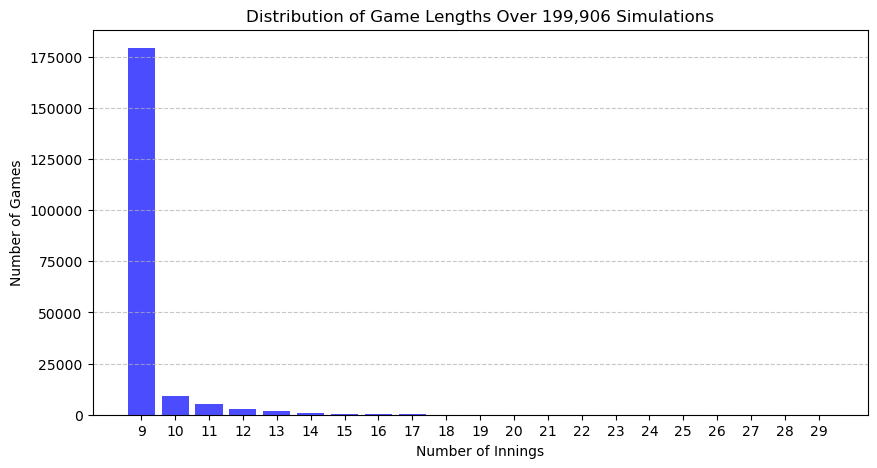

In [14]:
def Question1():
    totalA = 0
    totalB = 0
    inning = 1

    while inning <= 9 or totalA == totalB:
        totalA += R()
        totalB += R()
        inning += 1

    return inning - 1

def inning_count(num_simulations=199906):
    inning_counts = [Question1() for _ in range(num_simulations)]

    inning_distribution = Counter(inning_counts)

    sorted_innings = sorted(inning_distribution.items())
    probabilities = {innings: count / num_simulations * 100 for innings, count in sorted_innings}

    print("\nGame Length Distribution (199,906 simulations):")
    print(tabulate(
        [(innings, count, f"{probabilities[innings]:.5f}%") for innings, count in sorted_innings],
        headers=["Innings", "Games", "Probability"],
        tablefmt="grid"
    ))

    plt.figure(figsize=(10, 5))
    plt.bar([x[0] for x in sorted_innings], [x[1] for x in sorted_innings], color="blue", alpha=0.7)
    plt.xlabel("Number of Innings")
    plt.ylabel("Number of Games")
    plt.title("Distribution of Game Lengths Over 199,906 Simulations")
    plt.xticks(range(min(inning_counts), max(inning_counts) + 1))
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


inning_count()

Looking at the data from the table and graph above, the probabilities from the simulation of these 199,906 games closely resembles the data from Table 6. So, we can say that the number checks out based on the simulation.

### 2. How likely is it to have a game tied at 0-0 at the end of 9 innings? (Note: you can compare with an analytical solution for this one.)

To answer this question we will simulate the a different set of 199,906 baseball games, and track how many are tied at 0-0 through 9 innings of play.

In [18]:
def Question2():
    totalA = 0
    totalB = 0

    for _ in range(9):
        totalA += R()
        totalB += R()

    if totalA == 0 and totalB == 0:
        return True
    return False 

def deadlock(num_simulations=199906):
    zero_zero_count = 0 

    for _ in range(num_simulations):
        if Question2():
            zero_zero_count += 1

    probability = (zero_zero_count / num_simulations) * 100

    print(f"Out of {num_simulations} simulated games:")
    print(f"Number of games that were 0-0 after 9 innings: {zero_zero_count}")
    print(f"Probability of a 0-0 game after 9 innings: {probability:.4f}%")

deadlock()

Out of 199906 simulated games:
Number of games that were 0-0 after 9 innings: 690
Probability of a 0-0 game after 9 innings: 0.3452%


Looking at the data above, I was a little baffled at how low the percentage would be. From the perspective of a baseball fan, I was of the mind that this result would be way more common. However, after doing research, the number seem to be very similar to real life.

### 3. How likely is it to have a game to end with a combined score above 20 runs?

To answer this question, we must tweak the GlassLowryBall function to account for games that end with 21 or more combined runs scored by two teams.

In [22]:
def Question3():
    totalA = 0
    totalB = 0
    inning = 1

    while inning <= 9 or totalA == totalB:
        totalA += R()
        totalB += R()
        inning += 1

    return totalA + totalB > 20

def shootout(num_simulations=199906):
    high_scoring_count = sum(Question3() for _ in range(num_simulations))

    probability = (high_scoring_count / num_simulations) * 100

    print(f"Out of {num_simulations} simulated games:")
    print(f"Number of games with a combined score > 20: {high_scoring_count}")
    print(f"Probability of a game ending with a total score > 20: {probability:.4f}%")

shootout()

Out of 199906 simulated games:
Number of games with a combined score > 20: 1831
Probability of a game ending with a total score > 20: 0.9159%


Similar to my response in Question 2, the probability that came out of the 199,906 simulated games was a lot lower than anticipated.

### 4. How likely is it for a game to end where the winning team has more than double the score of the losing team?

In [25]:
def Question4():
    totalA = 0
    totalB = 0
    inning = 1

    while inning <= 9 or totalA == totalB:
        totalA += R()
        totalB += R()
        inning += 1

    
    return totalA, totalB

def landslide(num_simulations=199906):
    dominant_wins = 0

    for _ in range(num_simulations):
        scoreA, scoreB = Question4()
        winner = max(scoreA, scoreB)
        loser = min(scoreA, scoreB)

        if winner > 2 * loser:
            dominant_wins += 1

    probability = (dominant_wins / num_simulations) * 100

    print(f"Out of {num_simulations} simulated games:")
    print(f"Games where the winning team had more than double the losing team: {dominant_wins}")
    print(f"Probability of this occurring: {probability:.4f}%")

landslide()

Out of 199906 simulated games:
Games where the winning team had more than double the losing team: 96786
Probability of this occurring: 48.4158%


While the definition of landslide might not be an accurate title for a 3-1 victory, it interested me to see the probability be right around 48%. However, this would make sense given the average runs scored by both teams combined ranges between 10-12 runs, so there is not a ton of room for the winning team to be more than double the losing team. As we get further into this study, I am finding it more and more interesting how this run generator is effecting the questions.

### 5. How likely is it to have a game where the two scores never differ by more than one run at any point in the game?

To accomplish this, the code must be written in a way that tracks every game, while only indicating a success when the score stays within on run the entire game.

In [29]:
def Question5():
    scoreA = 0
    scoreB = 0
    inning = 1

    while inning <= 9 or scoreA == scoreB:
        runsA = R()
        runsB = R()
        scoreA += runsA

        if abs(scoreA - scoreB) > 1:
            return False 

        scoreB += runsB

        if abs(scoreA - scoreB) > 1:
            return False 

        inning += 1

    return True

def nailbiter(num_simulations=199906):
    closely_contested_count = sum(Question5() for _ in range(num_simulations))

    probability = (closely_contested_count / num_simulations) * 100

    print(f"Out of {num_simulations} simulated games:")
    print(f"Games where the score never differed by more than 1 run: {closely_contested_count}")
    print(f"Probability of this occurring: {probability:.4f}%")

nailbiter()

Out of 199906 simulated games:
Games where the score never differed by more than 1 run: 11777
Probability of this occurring: 5.8913%


### 6. How likely is it to have a team leading by 10 or more runs at any point in the game?

In [31]:
def Question6():
    scoreA = 0
    scoreB = 0
    inning = 1

    while inning <= 9 or scoreA == scoreB:
        runsA = R()
        runsB = R()
        scoreA += runsA

        if abs(scoreA - scoreB) >= 10:
            return True

        scoreB += runsB

        if abs(scoreA - scoreB) >= 10:
            return True

        inning += 1

    return False

def blowout(num_simulations=199906):
    blowout_count = sum(Question6() for _ in range(num_simulations))

    probability = (blowout_count / num_simulations) * 100

    print(f"Out of {num_simulations} simulated games:")
    print(f"Games where a team led by 10+ runs at some point: {blowout_count}")
    print(f"Probability of this occurring: {probability:.4f}%")

blowout()

Out of 199906 simulated games:
Games where a team led by 10+ runs at some point: 7053
Probability of this occurring: 3.5282%


### 7. How likey is it for a game to end with one run scored (i.e., 1-0 or 0-1)?

In this scenario, we can tweak the code from Question 6 to keep track of the 1-0 and 0-1 games among the other simulated games.

In [34]:
def Question7():
    scoreA = 0
    scoreB = 0
    inning = 1

    while inning <= 9 or scoreA == scoreB: 
        scoreA += R()
        scoreB += R()
        inning += 1

    return (scoreA + scoreB) == 1 

def pitchers_duel(num_simulations=199906):
    low_scoring_count = sum(Question7() for _ in range(num_simulations))

    probability = (low_scoring_count / num_simulations) * 100

    print(f"Out of {num_simulations} simulated games:")
    print(f"Games that ended 1-0 or 0-1: {low_scoring_count}")
    print(f"Probability of this occurring: {probability:.4f}%")

pitchers_duel()

Out of 199906 simulated games:
Games that ended 1-0 or 0-1: 2823
Probability of this occurring: 1.4122%


### 8. If a team is losing after the end of the 3rd inning, how likely is it that they will come back to win?

To do this, we must write a new code that tracks which team is losing after 3 innings and whether or not they come back to win the game.

In [37]:
def Question8():
    scoreA = 0
    scoreB = 0

    for _ in range(3):
        scoreA += R()
        scoreB += R()

    if scoreA < scoreB:
        losing_team = "A"
    elif scoreB < scoreA:
        losing_team = "B"
    else:
        return None

    inning = 4
    while inning <= 9 or scoreA == scoreB:
        scoreA += R()
        scoreB += R()
        inning += 1

    if scoreA > scoreB and losing_team == "A":
        return True
    elif scoreB > scoreA and losing_team == "B":
        return True
    return False

def comebacks(num_simulations=199906):
    total_comebacks = 0
    total_losing_teams = 0

    for _ in range(num_simulations):
        result = Question8()
        if result is not None:
            total_losing_teams += 1
            if result:
                total_comebacks += 1

    probability = (total_comebacks / total_losing_teams) * 100 if total_losing_teams > 0 else 0

    print(f"Out of {num_simulations} simulated games:")
    print(f"Total games where a team was losing after 3 innings: {total_losing_teams}")
    print(f"Total comebacks: {total_comebacks}")
    print(f"Probability of a comeback win: {probability:.4f}%")

comebacks()

Out of 199906 simulated games:
Total games where a team was losing after 3 innings: 150678
Total comebacks: 38944
Probability of a comeback win: 25.8458%


### 9. Suppose that a team is losing by 5 runs at the end of the 7th inning. How likely is it that they will come back and win?

We will now shift our focus to later in the game and ensure a larger deficit. I expect the probability to be much lower this time around as compared to the results from question 8.

In [40]:
def Question9():
    scoreA = 0
    scoreB = 0

    for _ in range(7):
        scoreA += R()
        scoreB += R()

    if scoreA + 5 == scoreB:
        losing_team = "A"
    elif scoreB + 5 == scoreA:
        losing_team = "B"
    else:
        return None

    inning = 8
    while inning <= 9 or scoreA == scoreB:
        scoreA += R()
        scoreB += R()
        inning += 1

    if scoreA > scoreB and losing_team == "A":
        return True
    elif scoreB > scoreA and losing_team == "B":
        return True
    return False

def big_comebacks(num_simulations=199906):
    total_comebacks = 0
    total_losing_teams = 0

    for _ in range(num_simulations):
        result = Question9()
        if result is not None:
            total_losing_teams += 1
            if result:
                total_comebacks += 1

    probability = (total_comebacks / total_losing_teams) * 100 if total_losing_teams > 0 else 0

    print(f"Out of {num_simulations} simulated games:")
    print(f"Total games where a team was losing by 5+ runs after 7 innings: {total_losing_teams}")
    print(f"Total successful comebacks: {total_comebacks}")
    print(f"Probability of a 5+ run comeback after 7 innings: {probability:.4f}%")

big_comebacks()

Out of 199906 simulated games:
Total games where a team was losing by 5+ runs after 7 innings: 15093
Total successful comebacks: 211
Probability of a 5+ run comeback after 7 innings: 1.3980%


As expected, it is very challenging to overcome such a large deficit in the late stages of the game, leading to under a 1% chance of being victorious. Nowadays, we see win probability during baseball games all the time, so it is easy to compare. Typically, this scenario in a real game does match what the simulation printed out.

### 10. If a team is losing going into the 9th inning, what is the probability that they will win?

Now we are tracking the ultimate comeback, whether or not a team losing in the 9th inning can come back to win. Now, the one barrier to this test is that if a team is trailing by 7+ runs going into the 9th inning, it will be impossible for them to come back and win based on our run generator not accounting for the probability of scoring 7,8,9 runs, etc.

In [44]:
def Question10():
    scoreA = 0
    scoreB = 0

    for _ in range(8):
        scoreA += R()
        scoreB += R()

    if scoreA < scoreB:
        losing_team = "A"
    elif scoreB < scoreA:
        losing_team = "B"
    else:
        return None

    scoreA += R()
    scoreB += R()

    inning = 10
    while scoreA == scoreB:
        scoreA += R()
        scoreB += R()
        inning += 1

    if scoreA > scoreB and losing_team == "A":
        return True
    elif scoreB > scoreA and losing_team == "B":
        return True
    return False

def ultimate_comebacks(num_simulations=199906):
    total_comebacks = 0
    total_losing_teams = 0

    for _ in range(num_simulations):
        result = Question10()
        if result is not None:
            total_losing_teams += 1
            if result:
                total_comebacks += 1

    probability = (total_comebacks / total_losing_teams) * 100 if total_losing_teams > 0 else 0

    print(f"Out of {num_simulations} simulated games:")
    print(f"Total games where a team was losing after 8 innings: {total_losing_teams}")
    print(f"Total successful 9th-inning comebacks: {total_comebacks}")
    print(f"Probability of a 9th-inning comeback: {probability:.4f}%")

ultimate_comebacks()

Out of 199906 simulated games:
Total games where a team was losing after 8 innings: 177877
Total successful 9th-inning comebacks: 10732
Probability of a 9th-inning comeback: 6.0334%


It is not shocking to see a probability of around 6% considering how easy it is to score 0 runs in an inning.

With all of these scenarios being considered, it is interesting to see how they came out given the data that was given through Glass and Lowry's article. Each scenario presented a new challenge to overcome for the simulated baseball teams and some of the numbers really stood out.

## The Post Season

While "Spring Training" laid the ground work and "Regular Season" kicked it up a notch by expanding on the previous data to answer the questions, "The Post Season" looks to take a more realistic approach to its work. While the run generator we originally used based on almost 200,000 games was functional, it levels out the playing field. This means that for each game that is simulated, the two teams have an equal probability to win the game and score a given number of runs per inning. However, this is real life we are talking about. Not everybody is exactly equal, and Major League Baseball is no exception. Take the 2024 season for example, the 2024 Los Angeles Dodgers, who finished with a record of 98-64 and won the World Series, are considerably better than the 2024 Chicago White Sox, who went 41-121 and set the record for most losses in a season. While this is an extreme example, these two teams show that the system must be tweaked to take into account how good or bad a given team is. The mission of this final project is to adjust the run generator for the 5 NL Central teams based on player projections prior to the 2025 season and run a simulation of games between the 5 teams and see how it compares to what happens in real life.

### Changing the Run Generator

To get an accurate slate of games between the two teams we need to alter the run generator that we created earlier. As a reminder, this is what the original generator looked like:

In [51]:
def R():
    u=U()
    if u<0.73:
        return 0
    elif u<0.878:
        return 1
    elif u<0.946:
        return 2
    elif u<0.977:
        return 3
    elif u<0.991:
        return 4
    elif u<0.997:
        return 5
    else:
        return 6

To change this run generator for all 5 teams in the NL Central, there are a few elements that we must add.

### 2025 Player Projections

The next thing that needs to happen is calculate the lambda value for each NL Central team. We will be using Poisson distribution since it effectively models the probability of rare events occurring over a given time or space. In this case, the rare events will be runs scored and the given space will be one half-inning. Using brute force, I was able to calculate the lambda value by using the following equation: 

Projected Team Runs/Projected Team Innings

In [57]:
lambda_CHC = 728/1242
print('Chicago Cubs -', lambda_CHC)

lambda_CIN = 636/1221
print('Cincinnati Reds -', lambda_CIN)

lambda_MIL = 610/1206
print('Milwaukee Brewers -', lambda_MIL)

lambda_PIT = 527/1136
print('Pittsburgh Pirates -', lambda_PIT)

lambda_STL = 639/1316
print('St. Louis Cardinals -', lambda_STL)

Chicago Cubs - 0.5861513687600645
Cincinnati Reds - 0.5208845208845209
Milwaukee Brewers - 0.5058043117744611
Pittsburgh Pirates - 0.4639084507042254
St. Louis Cardinals - 0.48556231003039513


Now that we have the lambda value for each NL Central team, we can use poisson distribution to tweak the original run generator for each team in the division.

#### Chicago Cubs Run Generator

In [60]:
def R_CHC():
    u=U()
    if u<0.5543:
        return 0
    elif u<0.8813:
        return 1
    elif u<0.9778:
        return 2
    elif u<0.9968:
        return 3
    elif u<0.9996:
        return 4
    elif u<0.9999:
        return 5
    else:
        return 6

#### Cincinnati Reds Run Generator

In [62]:
def R_CIN():
    u=U()
    if u<0.5945:
        return 0
    elif u<0.9036:
        return 1
    elif u<0.9840:
        return 2
    elif u<0.9979:
        return 3
    elif u<0.9997:
        return 4
    elif u<0.9999:
        return 5
    else:
        return 6

#### Milwaukee Brewers Run Generator

In [64]:
def R_MIL():
    u=U()
    if u<0.6005:
        return 0
    elif u<0.9068:
        return 1
    elif u<0.9849:
        return 2
    elif u<0.9982:
        return 3
    elif u<0.9998:
        return 4
    elif u<0.9999:
        return 5
    else:
        return 6

#### Pittsburgh Pirates Run Generator

In [66]:
def R_PIT():
    u=U()
    if u<0.6126:
        return 0
    elif u<0.9128:
        return 1
    elif u<0.9866:
        return 2
    elif u<0.9986:
        return 3
    elif u<0.9998:
        return 4
    elif u<0.9999:
        return 5
    else:
        return 6

#### St. Louis Cardinals Run Generator

In [68]:
def R_STL():
    u=U()
    if u<0.6313:
        return 0
    elif u<0.9217:
        return 1
    elif u<0.9885:
        return 2
    elif u<0.9987:
        return 3
    elif u<0.9998:
        return 4
    elif u<0.9999:
        return 5
    else:
        return 6

With the run generators for each team set up, we can now simulate the 130 games that will happen over the course of the 2025 season. We will track Wins(W), Losses(L), Runs Scored(RS), Runs Against(RA), and Run Differential (RD) and combine those simulated values into a standings board.

In [70]:
teams = ["Cubs", "Reds", "Brewers", "Cardinals", "Pirates"]

run_functions = {
    "Cubs": R_CHC,
    "Reds": R_CIN,
    "Brewers": R_MIL,
    "Cardinals": R_STL,
    "Pirates": R_PIT,
}

from itertools import combinations

games_per_matchup = 13  


standings = {
team: {"W": 0, "L": 0, "RS": 0, "RA": 0}
    for team in teams
}

def TaylorBall(home_team, away_team, R_HOME, R_AWAY):
    score_home = []
    score_away = []
    total_home = 0
    total_away = 0

    for inning in range(8):
        runs_away = R_AWAY()
        total_away += runs_away
        score_away.append(runs_away)

        runs_home = R_HOME()
        total_home += runs_home
        score_home.append(runs_home)

    runs_away = R_AWAY()
    total_away += runs_away
    score_away.append(runs_away)

    if total_home > total_away:
        score_home.append("X")
    else:
        runs_home = R_HOME()
        total_home += runs_home
        score_home.append(runs_home)

    inning = 10
    while total_home == total_away:
        runs_away = R_AWAY()
        total_away += runs_away
        score_away.append(runs_away)

        runs_home = R_HOME()
        total_home += runs_home
        score_home.append(runs_home)
        inning += 1

    if total_home > total_away:
        standings[home_team]["W"] += 1
        standings[away_team]["L"] += 1
    else:
        standings[away_team]["W"] += 1
        standings[home_team]["L"] += 1

    standings[home_team]["RS"] += total_home
    standings[home_team]["RA"] += total_away
    standings[away_team]["RS"] += total_away
    standings[away_team]["RA"] += total_home
    
matchups = list(combinations(teams, 2))

for team1, team2 in matchups:
    for game in range(games_per_matchup):
        home_team, away_team = (team1, team2) if game % 2 == 0 else (team2, team1)
        R_HOME = run_functions[home_team]
        R_AWAY = run_functions[away_team]
        TaylorBall(home_team, away_team, R_HOME, R_AWAY)

standings_df = pd.DataFrame(standings).T
standings_df["RD"] = standings_df["RS"] - standings_df["RA"]
standings_df = standings_df.sort_values(by=["W", "RD"], ascending=[False, False])
print(tabulate(standings_df, headers="keys", tablefmt="pretty"))

+-----------+----+----+-----+-----+-----+
|           | W  | L  | RS  | RA  | RD  |
+-----------+----+----+-----+-----+-----+
|   Cubs    | 31 | 21 | 274 | 220 | 54  |
|  Brewers  | 30 | 22 | 255 | 247 |  8  |
|   Reds    | 26 | 26 | 237 | 244 | -7  |
|  Pirates  | 23 | 29 | 231 | 256 | -25 |
| Cardinals | 20 | 32 | 222 | 252 | -30 |
+-----------+----+----+-----+-----+-----+


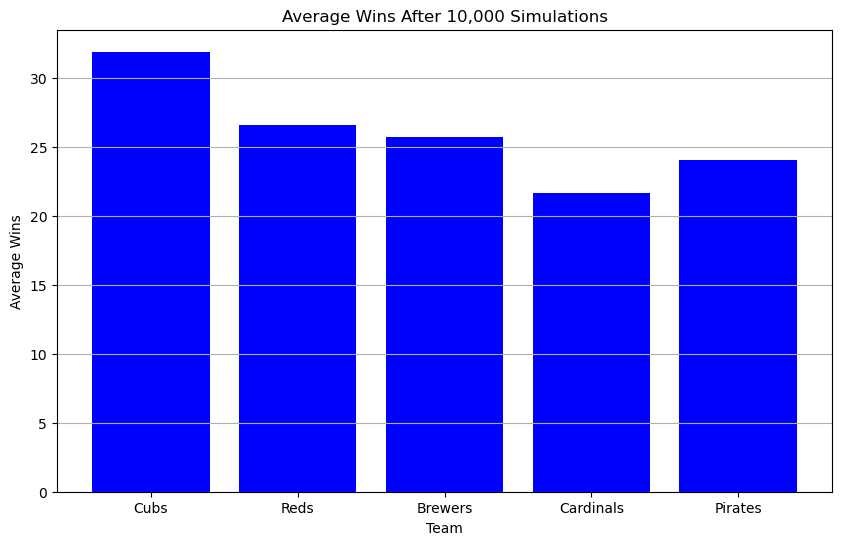

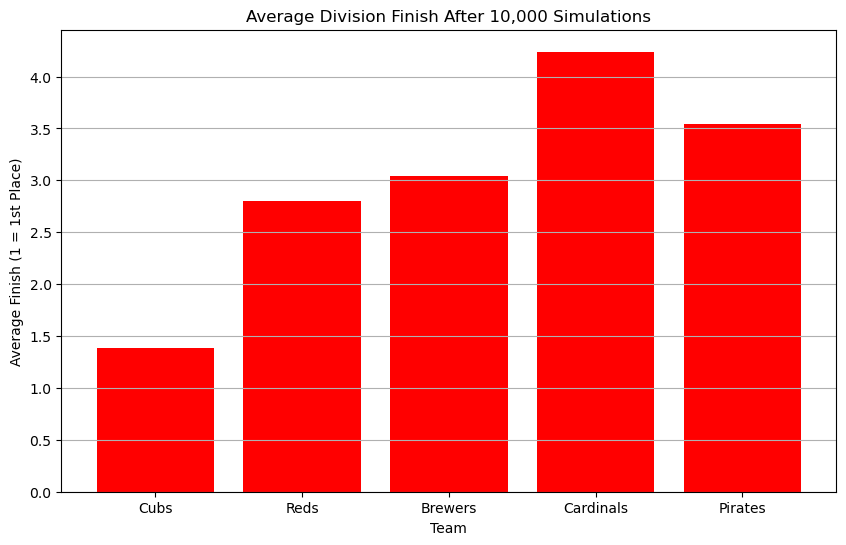

In [71]:
wins_tracker = {team: [] for team in teams}
finish_tracker = {team: [] for team in teams}

for sim in range(10000):
    standings = {
        team: {"W": 0, "L": 0, "RS": 0, "RA": 0}
        for team in teams
    }

    for team1, team2 in matchups:
        for game in range(games_per_matchup):
            home_team, away_team = (team1, team2) if game % 2 == 0 else (team2, team1)
            R_HOME = run_functions[home_team]
            R_AWAY = run_functions[away_team]
            TaylorBall(home_team, away_team, R_HOME, R_AWAY)

    standings_df = pd.DataFrame(standings).T
    standings_df["RD"] = standings_df["RS"] - standings_df["RA"]
    standings_df = standings_df.sort_values(by=["W", "RD"], ascending=[False, False])

    for team in teams:
        wins_tracker[team].append(standings[team]["W"])

    for place, team in enumerate(standings_df.index):
        finish_tracker[team].append(place + 1)  # 1st place = 1, etc.

# --- Plotting Average Wins ---
avg_wins = {team: np.mean(wins_tracker[team]) for team in teams}
plt.figure(figsize=(10, 6))
plt.bar(avg_wins.keys(), avg_wins.values(), color="blue")
plt.title("Average Wins After 10,000 Simulations")
plt.ylabel("Average Wins")
plt.xlabel("Team")
plt.grid(axis='y')
plt.show()

# --- Plotting Average Division Finish ---
avg_finish = {team: np.mean(finish_tracker[team]) for team in teams}
plt.figure(figsize=(10, 6))
plt.bar(avg_finish.keys(), avg_finish.values(), color="red")
plt.title("Average Division Finish After 10,000 Simulations")
plt.ylabel("Average Finish (1 = 1st Place)")
plt.xlabel("Team")
plt.grid(axis='y')
plt.show()

# "How can you not be romantic about (simulated) baseball?" -Billy Beane (Brad Pitt)